In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import NaN

In [56]:
def get_df_by_year(df, year):
    return df[df['year']==year]

def get_percentage_replayable_for_year(df, year):
  # get only the mementos in the given year
  df_for_year=get_df_by_year(df, year)

  #get warc/revisits
  df_warc=df_for_year[df_for_year['status_code']=='-']
  warc_to_2xx=evaluate_redirects_to_v2(df_warc)['to_2xx']

  #get successes
  df_success=df_for_year[df_for_year['status_code']=='200']
  successes=get_rows_in_df(df_success)

  #get redirections(3xx)
  df_redirection=df_for_year[df_for_year['status_code'].isin(['301', '302'])]
  #print(evaluate_redirects_to(df_redirection))
  redirection_to_login=evaluate_redirects_to(df_redirection)['to_login']

  success=get_rows_in_df(df_success)
  replayable=success+warc_to_2xx

  print('replayable in '+str(year)+': ', replayable)
  #all mementos in year - (all redirections - redirections to login)
  total=get_rows_in_df(df_for_year)-(get_rows_in_df(df_redirection)-redirection_to_login)
  print('total in '+str(year)+': ', total)
  print('percentage replayable in', year, ': ')
  if total==0:
    return float('nan')
  print("{0:.2f}%".format(replayable/total * 100))
  return round((replayable/total * 100), 2)

def get_percentage_replayable_by_month(df, month, year):
    #subset df to mementos in month/year
    df_by_year=get_df_by_year(df, year)
    df_by_month_year=df_by_year[df_by_year['date'].str.startswith(str(month)+'/')]

    #get warc/revisits
    df_warc=df_by_month_year[df_by_month_year['status_code']=='-']
    warc_to_2xx=evaluate_redirects_to_v2(df_warc)['to_2xx']

    #get successes
    df_success=df_by_month_year[df_by_month_year['status_code']=='200']
    successes=get_rows_in_df(df_success)

    #get redirections(3xx)
    df_redirection=df_by_month_year[df_by_month_year['status_code'].isin(['301', '302'])]
    #print(evaluate_redirects_to(df_redirection))
    redirection_to_login=evaluate_redirects_to(df_redirection)['to_login']

    success=get_rows_in_df(df_success)
    replayable=success+warc_to_2xx

    print('replayable in '+str(year)+': ', replayable)
    #all mementos in year - (all redirections - redirections to login)
    total=get_rows_in_df(df_by_month_year)-(get_rows_in_df(df_redirection)-redirection_to_login)
    print('total in '+str(year)+': ', total)
    print('percentage replayable in', year, ': ')
    if total==0:
      return float('nan')
    print("{0:.2f}%".format(replayable/total * 100))
    return round((replayable/total * 100), 2)

def get_rows_in_df(df):
    return int(df.describe().loc['count'][0])

def evaluate_redirects_to(df):
  result={'to_2xx':0, 'to_login': 0, 'to_NaN':0}
  for x in df.redirects_to:
      if x is NaN:
        result['to_NaN']+=1
      elif 'login' in x:
        result['to_login']+=1
      else:
        result['to_2xx']+=1
  return result

def evaluate_redirects_to_v2(df):
  result={'to_2xx':0, 'to_login': 0, 'to_NaN':0}
  for x in range(get_rows_in_df(df)):
      redirects_to=df.iloc[x].redirects_to
      redirect_type=df.iloc[x].redirect_type
      if redirects_to is NaN:
        result['to_NaN']+=1
      elif 'login'==redirect_type:
        result['to_login']+=1
      elif '2xx'==redirect_type:
        result['to_2xx']+=1
  return result

def get_frequency_of_status_codes(df):
    return df['status_code'].value_counts()

def get_successes_per_year(df, year):
  # get only the mementos in the given year
  df_for_year=get_df_by_year(df, year)

  #get warc/revisits
  df_warc=df_for_year[df_for_year['status_code']=='-']
  warc_to_2xx=evaluate_redirects_to(df_warc)['to_2xx']

  #get successes
  df_success=df_for_year[df_for_year['status_code']=='200']
  successes=get_rows_in_df(df_success)

  success=get_rows_in_df(df_success)
  replayable=success+warc_to_2xx
  return replayable

In [43]:
data=pd.read_csv('t25_all.csv')


In [41]:
get_frequency_of_status_codes(data)

-      22125
200    21046
301    20042
302     7105
429     4798
404      204
503       45
500        6
400        5
502        1
504        1
Name: status_code, dtype: int64

In [31]:
redirect_type=[NaN for i in range(get_rows_in_df(data))]
data['redirect_type']=redirect_type
data

,year,urim,status_code,date,time,mimetype,digest,redirects_to,redirect_type
index,,,,,,,,,
0,2012,https://web.archive.org/web/20121111004618/htt...,200,11/11/2012,0:46:18,NaN,F24ITJ3DP5A2I7SXN7GAGCYV6HO7M2EF,NaN,NaN
1,2012,https://web.archive.org/web/20121129232611/htt...,200,11/29/2012,23:26:11,NaN,DSYS6QH7NEXOPK626N4TTQHSGUSUKJMJ,NaN,NaN
2,2012,https://web.archive.org/web/20121129232611/htt...,200,11/29/2012,23:26:11,NaN,DSYS6QH7NEXOPK626N4TTQHSGUSUKJMJ,NaN,NaN
3,2013,https://web.archive.org/web/20130424203016/htt...,200,4/24/2013,20:30:16,NaN,AXCCX5JKNA5H4FFCR5H2OEJ7TNIYT62U,NaN,NaN
4,2013,https://web.archive.org/web/20130701161802/htt...,200,7/1/2013,16:18:02,NaN,SKD4CWH37TKECGFFKCCRFEQTYFS6T2S4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
75373,2023,https://web.archive.org/web/20230629062711/htt...,-,6/29/2023,6:27:11,warc/revisit,3I42H3S6NNFQ2MSVX7XZKYAYSCX5QBYJ,https://web.archive.org/web/20230629062711/htt...,NaN
75374,2023,https://web.archive.org/web/20230629100730/htt...,-,6/29/2023,10:07:30,warc/revisit,3I42H3S6NNFQ2MSVX7XZKYAYSCX5QBYJ,https://web.archive.org/web/20230629100730/htt...,NaN
75375,2023,https://web.archive.org/web/20230629133426/htt...,-,6/29/2023,13:34:26,warc/revisit,3I42H3S6NNFQ2MSVX7XZKYAYSCX5QBYJ,https://web.archive.org/web/20230629133426/htt...,NaN


In [48]:
data_successful=data[data['status_code'] == '200']
data_unsuccessful=data[data['status_code']!='200']
data_redirect=data[data['status_code'].isin(['301', '302', '-'])]
df_4xx=data[data['status_code'].isin(['400', '404', '429'])]
df_5xx=data[data['status_code'].isin(['500', '504', '502', '503'])]

In [33]:
x=data_redirect[data_redirect['redirects_to'].notnull()]

In [38]:
data_redirect[(data_redirect['redirects_to'].isnull()) & (data_redirect['status_code']=='-')]

,year,urim,status_code,date,time,mimetype,digest,redirects_to,redirect_type
index,,,,,,,,,
1142,2018,https://web.archive.org/web/20180406173258/htt...,-,4/6/2018,17:32:58,warc/revisit,3I42H3S6NNFQ2MSVX7XZKYAYSCX5QBYJ,NaN,NaN
1238,2018,https://web.archive.org/web/20180902043838/htt...,-,9/2/2018,4:38:38,warc/revisit,3I42H3S6NNFQ2MSVX7XZKYAYSCX5QBYJ,NaN,NaN
1294,2018,https://web.archive.org/web/20181208045824/htt...,-,12/8/2018,4:58:24,warc/revisit,RTY3MJFUYMZLV2Y4ZWGHQA7RFMNMQNSO,NaN,NaN
1295,2018,https://web.archive.org/web/20181209223059/htt...,-,12/9/2018,22:30:59,warc/revisit,RTY3MJFUYMZLV2Y4ZWGHQA7RFMNMQNSO,NaN,NaN
1298,2018,https://web.archive.org/web/20181211165115/htt...,-,12/11/2018,16:51:15,warc/revisit,RTY3MJFUYMZLV2Y4ZWGHQA7RFMNMQNSO,NaN,NaN
...,...,...,...,...,...,...,...,...,...
75343,2023,https://web.archive.org/web/20230307130526/htt...,-,3/7/2023,13:05:26,warc/revisit,3I42H3S6NNFQ2MSVX7XZKYAYSCX5QBYJ,NaN,NaN
75344,2023,https://web.archive.org/web/20230307131150/htt...,-,3/7/2023,13:11:50,warc/revisit,3I42H3S6NNFQ2MSVX7XZKYAYSCX5QBYJ,NaN,NaN
75345,2023,https://web.archive.org/web/20230308165435/htt...,-,3/8/2023,16:54:35,warc/revisit,3I42H3S6NNFQ2MSVX7XZKYAYSCX5QBYJ,NaN,NaN


In [8]:
data_redirect_not_null=data_redirect[data_redirect['redirects_to'].notnull()]

In [31]:
repr(y)

"'https://web.archive.org/web/20131206210233/http://instagram.com/arianagrande'"

In [10]:
x=['https://web.archive.org/web/20131206210233/http://instagram.com/arianagrande']

In [39]:
disinfo_df=pd.read_csv('disinfo_12.csv')
get_frequency_of_status_codes(disinfo_df)

302    1050
301     949
-       111
200      89
429       4
Name: status_code, dtype: int64

In [40]:
health_official_df=pd.read_csv('health_officials.csv')
ho_df_redirect=health_official_df[health_official_df['status_code'].isin(['301', '302', '-'])]
get_frequency_of_status_codes(health_official_df)

302    3007
200    1519
301    1080
-       482
429     109
560       2
503       1
404       1
Name: status_code, dtype: int64

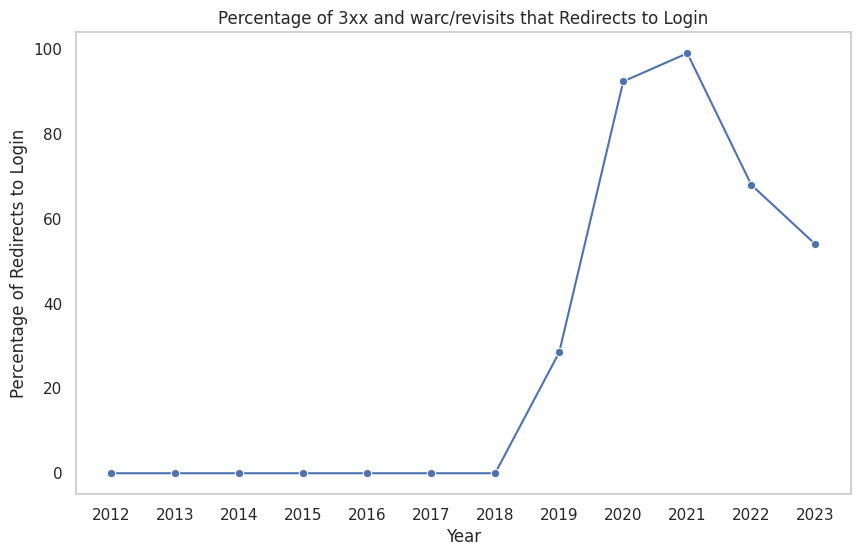

In [66]:
plt.figure(figsize=(10, 6))
years=[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
sns.set_style("whitegrid", {'axes.grid' : False})

lineplot=sns.lineplot(x=years, y=percentage_redirect_to_login, marker='o')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Percentage of Redirects to Login')
plt.title('Percentage of 3xx and warc/revisits that Redirects to Login')
# Add percentage annotations to the line plot
#for i in range(len(years)):
    #lineplot.annotate(f'{percentage_replayable_list[i]}%', (years[i], percentage_replayable_list[i]), ha='center', va='bottom')

# Show the plot
plt.show()

In [57]:
years=[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
dataset=[]
for i in range(0,12):
  dataset.append('Top 25 Most Followed Instagram Accounts')
for i in range(0,12):
  dataset.append('Disinformation Dozen')
for i in range(0,12):
  dataset.append('Health Authorities')

percentage_replayable_top_25=[]
for year in range(2012,2024):
  percent=get_percentage_replayable_for_year(data, year)
  percentage_replayable_top_25.append(percent)
print(percentage_replayable_top_25)

percentage_replayable_disinfo_12=[]
for year in range(2012,2024):
  percent=get_percentage_replayable_for_year(disinfo_df, year)
  percentage_replayable_disinfo_12.append(percent)
print(percentage_replayable_disinfo_12)

percentage_replayable_health_officials=[]
for year in range(2012,2024):
  percent=get_percentage_replayable_for_year(health_official_df, year)
  percentage_replayable_health_officials.append(percent)
print(percentage_replayable_health_officials)

all_mementos_dict={'Year':years+years+years, 'Percentage Replayable': percentage_replayable_top_25+percentage_replayable_disinfo_12+percentage_replayable_health_officials, 'Dataset': dataset}
input=pd.DataFrame(all_mementos_dict)
print(input)
'''percentage_replayable_top_25=[]
years=[2011, 2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]

for year in range(2011,2024):
  percent=get_percentage_replyable_for_year(data, year)
  percentage_replayable_top_25.append(percent)
print(percentage_replayable_top_25)'''

replayable in 2012:  111
total in 2012:  130
percentage replayable in 2012 : 
85.38%
replayable in 2013:  562
total in 2013:  609
percentage replayable in 2013 : 
92.28%
replayable in 2014:  4717
total in 2014:  4742
percentage replayable in 2014 : 
99.47%
replayable in 2015:  5368
total in 2015:  5398
percentage replayable in 2015 : 
99.44%
replayable in 2016:  4669
total in 2016:  4869
percentage replayable in 2016 : 
95.89%
replayable in 2017:  5123
total in 2017:  5189
percentage replayable in 2017 : 
98.73%
replayable in 2018:  3149
total in 2018:  3206
percentage replayable in 2018 : 
98.22%
replayable in 2019:  1359
total in 2019:  1750
percentage replayable in 2019 : 
77.66%
replayable in 2020:  611
total in 2020:  5897
percentage replayable in 2020 : 
10.36%
replayable in 2021:  26
total in 2021:  8518
percentage replayable in 2021 : 
0.31%
replayable in 2022:  2605
total in 2022:  16517
percentage replayable in 2022 : 
15.77%
replayable in 2023:  73
total in 2023:  3176
perce

'percentage_replayable_top_25=[]\nyears=[2011, 2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]\n\nfor year in range(2011,2024):\n  percent=get_percentage_replyable_for_year(data, year)\n  percentage_replayable_top_25.append(percent)\nprint(percentage_replayable_top_25)'

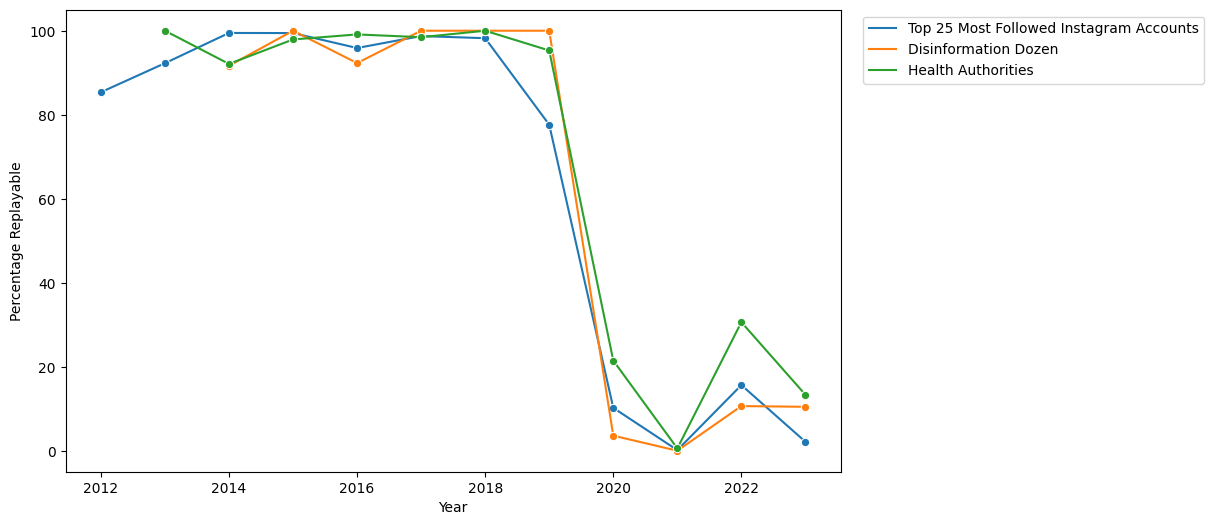

In [58]:
plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=input, x="Year", y="Percentage Replayable", hue="Dataset", legend="full", marker='o' )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left');
ax.set_xlabel ("Year")
ax.set_ylabel ("Percentage Replayable")
#ax.set_title ("");

# Show the plot
plt.show()

In [62]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
year=2019

dataset=[]
for i in range(0,12):
  dataset.append('Top 25 Most Followed Instagram Accounts')

percentage_replayable_top_25=[]
for month in months:
  percentage_replayable=get_percentage_replayable_by_month(data, month, year)
  percentage_replayable_top_25.append(percentage_replayable)
print(percentage_replayable_top_25)


months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

all_mementos_dict={'Months':months, 'Percentage Replayable': percentage_replayable_top_25, 'Dataset': dataset}
input=pd.DataFrame(all_mementos_dict)
print(input)

replayable in 2019:  214
total in 2019:  222
percentage replayable in 2019 : 
96.40%
replayable in 2019:  152
total in 2019:  155
percentage replayable in 2019 : 
98.06%
replayable in 2019:  134
total in 2019:  137
percentage replayable in 2019 : 
97.81%
replayable in 2019:  143
total in 2019:  144
percentage replayable in 2019 : 
99.31%
replayable in 2019:  108
total in 2019:  109
percentage replayable in 2019 : 
99.08%
replayable in 2019:  84
total in 2019:  84
percentage replayable in 2019 : 
100.00%
replayable in 2019:  89
total in 2019:  89
percentage replayable in 2019 : 
100.00%
replayable in 2019:  99
total in 2019:  100
percentage replayable in 2019 : 
99.00%
replayable in 2019:  39
total in 2019:  45
percentage replayable in 2019 : 
86.67%
replayable in 2019:  129
total in 2019:  379
percentage replayable in 2019 : 
34.04%
replayable in 2019:  66
total in 2019:  171
percentage replayable in 2019 : 
38.60%
replayable in 2019:  102
total in 2019:  115
percentage replayable in 2

'percentage_replayable_top_25=[]\nyears=[2011, 2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]\n\nfor year in range(2011,2024):\n  percent=get_percentage_replyable_for_year(data, year)\n  percentage_replayable_top_25.append(percent)\nprint(percentage_replayable_top_25)'

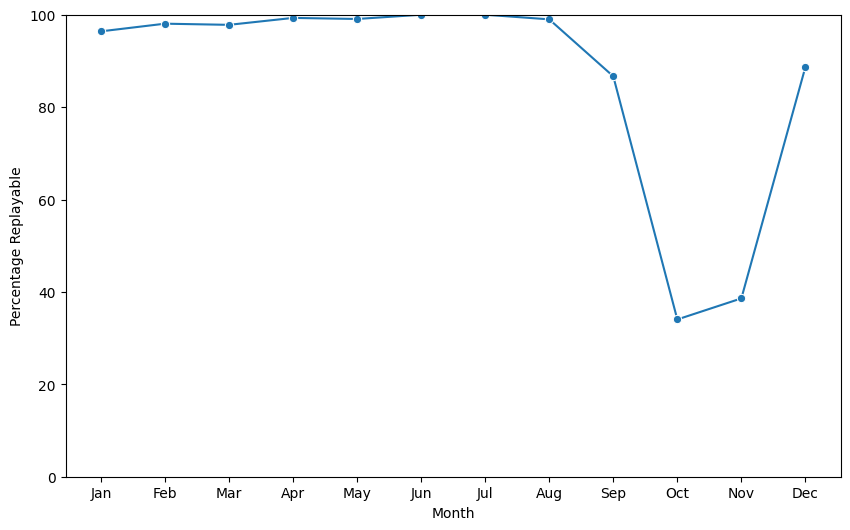

In [63]:
plt.figure(figsize=(10, 6))

ax = sns.lineplot( x=months, y=percentage_replayable_top_25,  marker='o' )
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left');
ax.set_xlabel ("Month")
ax.set_ylabel ("Percentage Replayable")
plt.ylim(0, 100)
#ax.set_title ("");

# Show the plot
plt.show()

In [64]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
year=2020

dataset=[]
for i in range(0,12):
  dataset.append('Top 25 Most Followed Instagram Accounts')

percentage_replayable_top_25=[]
for month in months:
  percentage_replayable=get_percentage_replayable_by_month(data, month, year)
  percentage_replayable_top_25.append(percentage_replayable)
print(percentage_replayable_top_25)


months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

all_mementos_dict={'Months':months, 'Percentage Replayable': percentage_replayable_top_25, 'Dataset': dataset}
input=pd.DataFrame(all_mementos_dict)
print(input)

replayable in 2020:  83
total in 2020:  111
percentage replayable in 2020 : 
74.77%
replayable in 2020:  59
total in 2020:  79
percentage replayable in 2020 : 
74.68%
replayable in 2020:  39
total in 2020:  65
percentage replayable in 2020 : 
60.00%
replayable in 2020:  61
total in 2020:  93
percentage replayable in 2020 : 
65.59%
replayable in 2020:  119
total in 2020:  299
percentage replayable in 2020 : 
39.80%
replayable in 2020:  21
total in 2020:  113
percentage replayable in 2020 : 
18.58%
replayable in 2020:  0
total in 2020:  124
percentage replayable in 2020 : 
0.00%
replayable in 2020:  13
total in 2020:  117
percentage replayable in 2020 : 
11.11%
replayable in 2020:  32
total in 2020:  182
percentage replayable in 2020 : 
17.58%
replayable in 2020:  52
total in 2020:  175
percentage replayable in 2020 : 
29.71%
replayable in 2020:  131
total in 2020:  3325
percentage replayable in 2020 : 
3.94%
replayable in 2020:  1
total in 2020:  1214
percentage replayable in 2020 : 
0.

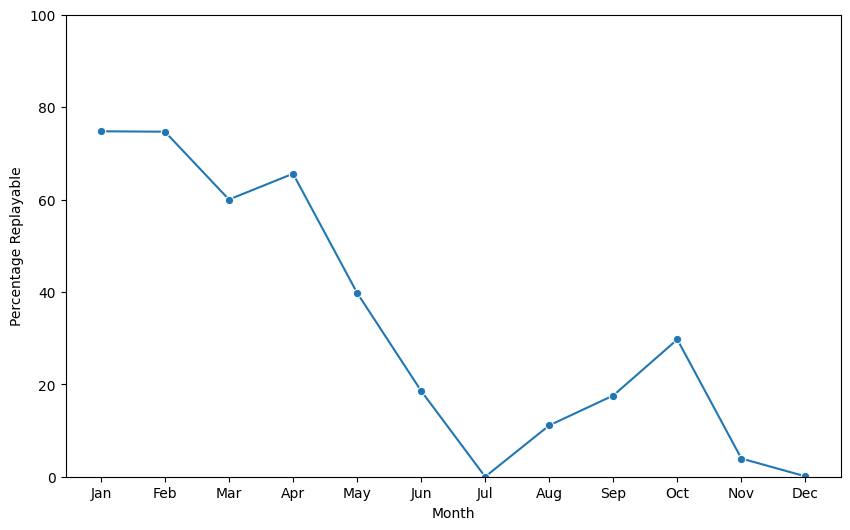

In [65]:
plt.figure(figsize=(10, 6))

ax = sns.lineplot( x=months, y=percentage_replayable_top_25,  marker='o' )
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left');
ax.set_xlabel ("Month")
ax.set_ylabel ("Percentage Replayable")
plt.ylim(0, 100)
#ax.set_title ("");

# Show the plot
plt.show()

In [71]:
years=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
dataset=[]
for i in range(0,13):
  dataset.append('Top 25 Most Followed Instagram Accounts')
for i in range(0,13):
  dataset.append('Disinformation Dozen')
for i in range(0,13):
  dataset.append('Health Authorities')

successes_top_25=[]
for year in range(2011,2024):
  successes=get_successes_per_year(data, year)
  successes_top_25.append(successes)

successes_disinfo_12=[]
for year in range(2011,2024):
  successes=get_successes_per_year(disinfo_df, year)
  successes_disinfo_12.append(successes)


successes_health_officials=[]
for year in range(2011,2024):
  successes=get_successes_per_year(health_official_df, year)
  successes_health_officials.append(successes)

all_mementos_dict={'Year':years+years+years, 'Successes': successes_top_25+successes_disinfo_12+successes_health_officials, 'Dataset': dataset}
input=pd.DataFrame(all_mementos_dict)
print(input)

    Year  Successes                                  Dataset
0   2011          0  Top 25 Most Followed Instagram Accounts
1   2012        111  Top 25 Most Followed Instagram Accounts
2   2013        562  Top 25 Most Followed Instagram Accounts
3   2014       4717  Top 25 Most Followed Instagram Accounts
4   2015       5373  Top 25 Most Followed Instagram Accounts
5   2016       4707  Top 25 Most Followed Instagram Accounts
6   2017       5141  Top 25 Most Followed Instagram Accounts
7   2018       3158  Top 25 Most Followed Instagram Accounts
8   2019       1359  Top 25 Most Followed Instagram Accounts
9   2020        611  Top 25 Most Followed Instagram Accounts
10  2021         26  Top 25 Most Followed Instagram Accounts
11  2022       2920  Top 25 Most Followed Instagram Accounts
12  2023        476  Top 25 Most Followed Instagram Accounts
13  2011          0                     Disinformation Dozen
14  2012          0                     Disinformation Dozen
15  2013          0     

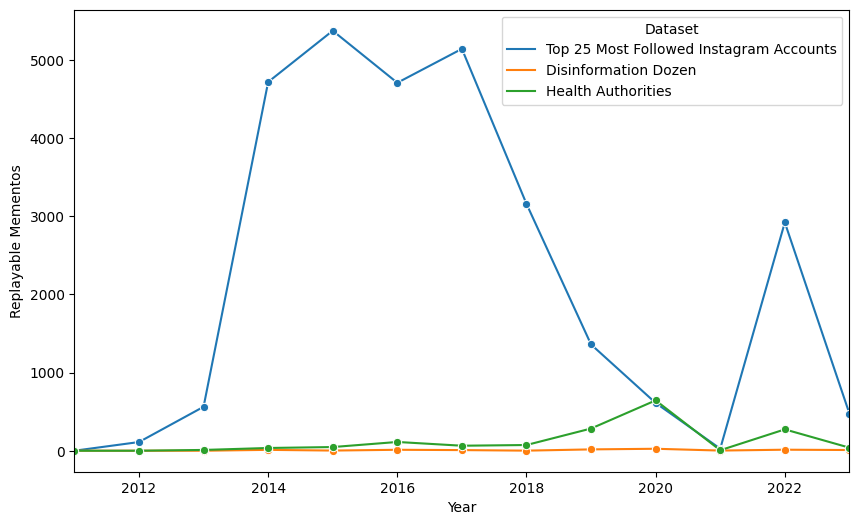

In [72]:
plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=input, x='Year', y='Successes',  marker='o', hue='Dataset' )
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left');
ax.set_xlabel ("Year")
ax.set_ylabel ("Replayable Mementos")
plt.xlim(2011, 2023)
#ax.set_title ("");

# Show the plot
plt.show()

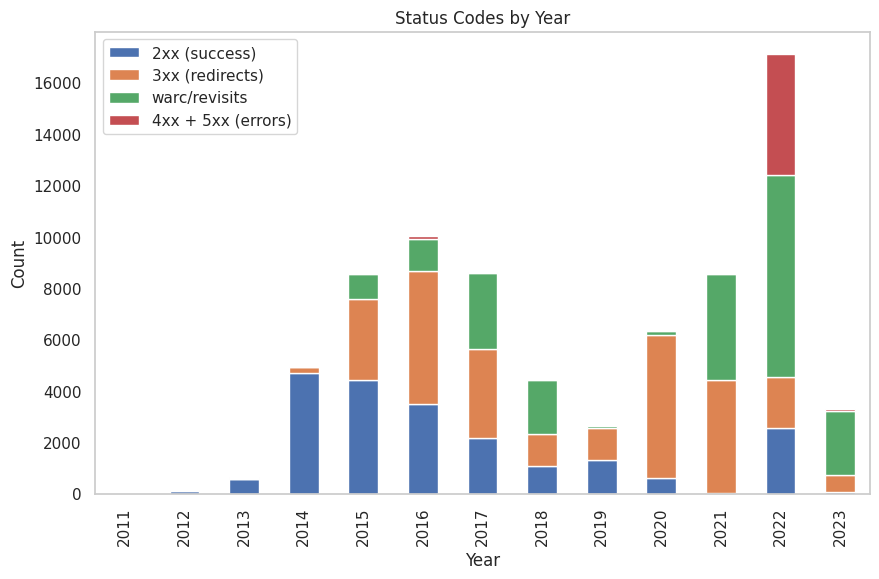

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# Sample data

# Convert data to DataFrame
df = pd.DataFrame(legend, index=years)

# Plotting
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_xlabel('Year')
ax.set_title('Status Codes by Year')

# Show the plot
plt.show()







